In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob
import talib as tl
import yfinance as yf


import os,sys
sys.path.append(os.path.abspath(os.path.join('..')))

from scripts.utils import *

Reading The Csv File`

In [26]:
tesla_df = pd.read_csv('../data/finance_data/TSLA_historical_data.csv')
tesla_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500,0.0,0.0
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500,0.0,0.0
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000,0.0,0.0
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000,0.0,0.0
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500,0.0,0.0


In [27]:
tsla = yf.Ticker('TSLA')
tsla

yfinance.Ticker object <TSLA>

In [28]:
tsla.info

{'address1': '1 Tesla Road',
 'city': 'Austin',
 'state': 'TX',
 'zip': '78725',
 'country': 'United States',
 'phone': '512 516 8177',
 'website': 'https://www.tesla.com',
 'industry': 'Auto Manufacturers',
 'industryKey': 'auto-manufacturers',
 'industryDisp': 'Auto Manufacturers',
 'sector': 'Consumer Cyclical',
 'sectorKey': 'consumer-cyclical',
 'sectorDisp': 'Consumer Cyclical',
 'longBusinessSummary': 'Tesla, Inc. designs, develops, manufactures, leases, and sells electric vehicles, and energy generation and storage systems in the United States, China, and internationally. The company operates in two segments, Automotive, and Energy Generation and Storage. The Automotive segment offers electric vehicles, as well as sells automotive regulatory credits; and non-warranty after-sales vehicle, used vehicles, body shop and parts, supercharging, retail merchandise, and vehicle insurance services. This segment also provides sedans and sport utility vehicles through direct and used vehic

In [29]:
hist = tsla.history(period='max')
hist.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-08-26 00:00:00-04:00,218.750000,219.089996,211.009995,213.210007,59301200,0.0,0.0
2024-08-27 00:00:00-04:00,213.250000,215.660004,206.940002,209.210007,62821400,0.0,0.0
2024-08-28 00:00:00-04:00,209.720001,211.839996,202.589996,205.750000,64116400,0.0,0.0
2024-08-29 00:00:00-04:00,209.800003,214.889999,205.970001,206.279999,62308800,0.0,0.0
2024-08-30 00:00:00-04:00,208.630005,214.570007,207.029999,214.110001,63246000,0.0,0.0


Simple Moving Average to smooth the price data

In [30]:
tesla_df['SMA_100'] = tl.SMA(tesla_df['Close'], timeperiod=100)

In [31]:
tesla_df.tail(100)

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,SMA_100
3445,2024-03-07,174.350006,180.039993,173.699997,178.649994,178.649994,102129000,0.0,0.0,219.6867
3446,2024-03-08,181.500000,182.729996,174.699997,175.339996,175.339996,85315300,0.0,0.0,218.9289
3447,2024-03-11,175.449997,182.869995,174.800003,177.770004,177.770004,85391500,0.0,0.0,218.1674
3448,2024-03-12,177.770004,179.429993,172.410004,177.539993,177.539993,87391700,0.0,0.0,217.3943
3449,2024-03-13,173.050003,176.050003,169.149994,169.479996,169.479996,106524500,0.0,0.0,216.6623
...,...,...,...,...,...,...,...,...,...,...
3540,2024-07-24,225.419998,225.990005,214.710007,215.990005,215.990005,167942900,0.0,0.0,187.0056
3541,2024-07-25,216.800003,226.000000,216.229996,220.250000,220.250000,100636500,0.0,0.0,187.1817
3542,2024-07-26,221.190002,222.279999,215.330002,219.800003,219.800003,94604100,0.0,0.0,187.4983
3543,2024-07-29,224.899994,234.270004,224.699997,232.100006,232.100006,129201800,0.0,0.0,188.0119


Relative Strength Index (RSI)

In [32]:
tesla_df['RSI'] = tl.RSI(tesla_df['Close'], timeperiod=14)

In [33]:
tesla_df.tail(100)

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,SMA_100,RSI
3445,2024-03-07,174.350006,180.039993,173.699997,178.649994,178.649994,102129000,0.0,0.0,219.6867,35.607311
3446,2024-03-08,181.500000,182.729996,174.699997,175.339996,175.339996,85315300,0.0,0.0,218.9289,33.642587
3447,2024-03-11,175.449997,182.869995,174.800003,177.770004,177.770004,85391500,0.0,0.0,218.1674,36.416369
3448,2024-03-12,177.770004,179.429993,172.410004,177.539993,177.539993,87391700,0.0,0.0,217.3943,36.261858
3449,2024-03-13,173.050003,176.050003,169.149994,169.479996,169.479996,106524500,0.0,0.0,216.6623,31.257115
...,...,...,...,...,...,...,...,...,...,...,...
3540,2024-07-24,225.419998,225.990005,214.710007,215.990005,215.990005,167942900,0.0,0.0,187.0056,44.886918
3541,2024-07-25,216.800003,226.000000,216.229996,220.250000,220.250000,100636500,0.0,0.0,187.1817,46.951389
3542,2024-07-26,221.190002,222.279999,215.330002,219.800003,219.800003,94604100,0.0,0.0,187.4983,46.752165
3543,2024-07-29,224.899994,234.270004,224.699997,232.100006,232.100006,129201800,0.0,0.0,188.0119,52.664511


Moving Average Convergence Divergence (MACD)

In [34]:
tesla_df['MACD'], tesla_df['MACD_Signal'], tesla_df['MACD_Hist'] = tl.MACD(tesla_df['Close'], fastperiod=12, slowperiod=26, signalperiod=9)


In [35]:
tesla_df.tail(100)

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,SMA_100,RSI,MACD,MACD_Signal,MACD_Hist
3445,2024-03-07,174.350006,180.039993,173.699997,178.649994,178.649994,102129000,0.0,0.0,219.6867,35.607311,-5.124990,-4.074178,-1.050812
3446,2024-03-08,181.500000,182.729996,174.699997,175.339996,175.339996,85315300,0.0,0.0,218.9289,33.642587,-5.870812,-4.433505,-1.437307
3447,2024-03-11,175.449997,182.869995,174.800003,177.770004,177.770004,85391500,0.0,0.0,218.1674,36.416369,-6.194395,-4.785683,-1.408712
3448,2024-03-12,177.770004,179.429993,172.410004,177.539993,177.539993,87391700,0.0,0.0,217.3943,36.261858,-6.395672,-5.107681,-1.287991
3449,2024-03-13,173.050003,176.050003,169.149994,169.479996,169.479996,106524500,0.0,0.0,216.6623,31.257115,-7.123444,-5.510833,-1.612611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3540,2024-07-24,225.419998,225.990005,214.710007,215.990005,215.990005,167942900,0.0,0.0,187.0056,44.886918,11.789291,15.873789,-4.084498
3541,2024-07-25,216.800003,226.000000,216.229996,220.250000,220.250000,100636500,0.0,0.0,187.1817,46.951389,9.353206,14.569672,-5.216466
3542,2024-07-26,221.190002,222.279999,215.330002,219.800003,219.800003,94604100,0.0,0.0,187.4983,46.752165,7.302106,13.116159,-5.814053
3543,2024-07-29,224.899994,234.270004,224.699997,232.100006,232.100006,129201800,0.0,0.0,188.0119,52.664511,6.593101,11.811547,-5.218447


Visualize the Indicators`

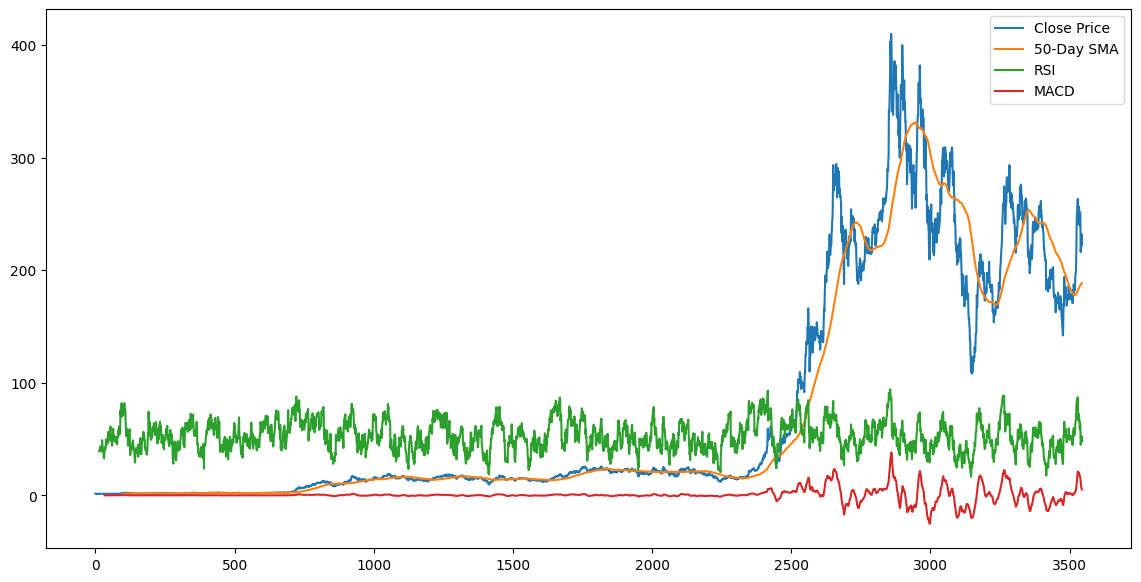

In [37]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,7))
plt.plot(tesla_df['Close'], label='Close Price')
plt.plot(tesla_df['SMA_100'], label='50-Day SMA')
plt.plot(tesla_df['RSI'], label='RSI')
plt.plot(tesla_df['MACD'], label='MACD')
plt.legend()
plt.show()
